### Linear Model Selection and Regularization

This programming assignment will use the `Tidy Models` platform. It will take a look at regularization models and hyperparameter tuning. These models contain a regularization term. This assignment will use [parsnip](https://www.tidymodels.org/start/models/) for model fitting and [recipes and workflows](https://www.tidymodels.org/start/recipes/) to perform the transformations, and [tune and dials](https://www.tidymodels.org/start/tuning/) to tune the hyperparameters of the model.

You will be using the `Hitters` data set from the `ISLR` package. You wish to predict the baseball players `Salary` based on several different characteristics which are included in the data set. 

Since you wish to predict `Salary`, then you need to remove any missing data from that column. Otherwise, you won't be able to run the models.

**Set output as** `Hitters`. Make sure it is in a tibble format

In [1]:
# Load necessary libraries
library(tidymodels)
library(ISLR2)

# Load and clean the Hitters dataset
data("Hitters")
Hitters <- as_tibble(Hitters)
Hitters <- Hitters %>% drop_na(Salary)


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ recipes      1.0.9
✔ dials        1.2.0     ✔ rsample      1.2.0
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.4.4     ✔ tidyr        1.3.1
✔ infer        1.0.6     ✔ tune         1.1.2
✔ modeldata    1.3.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.3.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/



In [2]:
# Hidden Tests

You will use the `glmnet` package to perform **ridge regression**. `parsnip` does not have a dedicated function to create a ridge regression model specification. You need to use `linear_reg()` and set `mixture = 0` to specify a ridge model. The `mixture` argument specifies the amount of different types of regularization, `mixture = 0` specifies only **ridge regularization** and `mixture = 1` specifies only **lasso regularization**. 

Setting `mixture` to a value between 0 and 1 lets us use both. When using the `glmnet` engine you also need to set a `penalty` to be able to fit the model. You will set this value to `0` for now, it is not the best value, but you will look at how to select the best value in a little bit.

In [3]:
ridge_spec <- linear_reg(mixture = 0, penalty = 0) %>%
  set_mode("regression") %>%
  set_engine("glmnet")

Once the specification is created you can fit it to you data. You will use all the predictors. Use the `fit` function here. 

In [4]:
ridge_fit <- fit(ridge_spec, Salary ~ ., data = Hitters)

The `glmnet` package will fit the model for all values of `penalty` at once, so you can now see see what the parameter estimate for the model is now that you have `penalty = 0`. You can use the `tidy` function to accomplish this specific  task. 

In [5]:
tidy(ridge_fit)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8



term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),8.112693e+01,0
AtBat,-6.815959e-01,0
Hits,2.772312e+00,0
HmRun,-1.365680e+00,0
Runs,1.014826e+00,0
RBI,7.130224e-01,0
Walks,3.378558e+00,0
Years,-9.066800e+00,0
CAtBat,-1.199478e-03,0


Let us instead see what the estimates would be if the penalty was `11498`. Store your output to `tidy2`. What do you notice?  

In [6]:
# Specify the ridge regression model with penalty = 11498
ridge_spec <- linear_reg(mixture = 0, penalty = 11498) %>%
  set_mode("regression") %>%
  set_engine("glmnet")

# Fit the ridge regression model
ridge_fit <- fit(ridge_spec, Salary ~ ., data = Hitters)

# Inspect the model coefficients
tidy2 <- tidy(ridge_fit)

# View the results
tidy2

term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),407.205936774,11498
AtBat,0.037003083,11498
Hits,0.138357552,11498
HmRun,0.525195508,11498
Runs,0.230978290,11498
RBI,0.240114775,11498
Walks,0.289971555,11498
Years,1.108832399,11498
CAtBat,0.003135215,11498


In [7]:
# Hidden Tests

Look below at the parameter estimates for `penalty = 705`. Store your output to `tidy3`. Once again, use the `tidy` function to accomplish this task. 

In [8]:
# Specify the ridge regression model with penalty = 705
ridge_spec <- linear_reg(mixture = 0, penalty = 705) %>%
  set_mode("regression") %>%
  set_engine("glmnet")

# Fit the ridge regression model
ridge_fit <- fit(ridge_spec, Salary ~ ., data = Hitters)

# Inspect the model coefficients
tidy3 <- tidy(ridge_fit)

# View the results
tidy3


term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),54.39019010,705
AtBat,0.11199103,705
Hits,0.65618308,705
HmRun,1.17557058,705
Runs,0.93745780,705
RBI,0.84682838,705
Walks,1.32044897,705
Years,2.58210272,705
CAtBat,0.01082850,705


In [9]:
# Hidden Tests

You can visualize how the magnitude of the coefficients are being regularized towards zero as the penalty goes up. Use the `autoplot()` function to accomplish this task. **Output variable here is** `ridge_fit`. Your image should look like this: 

<div>
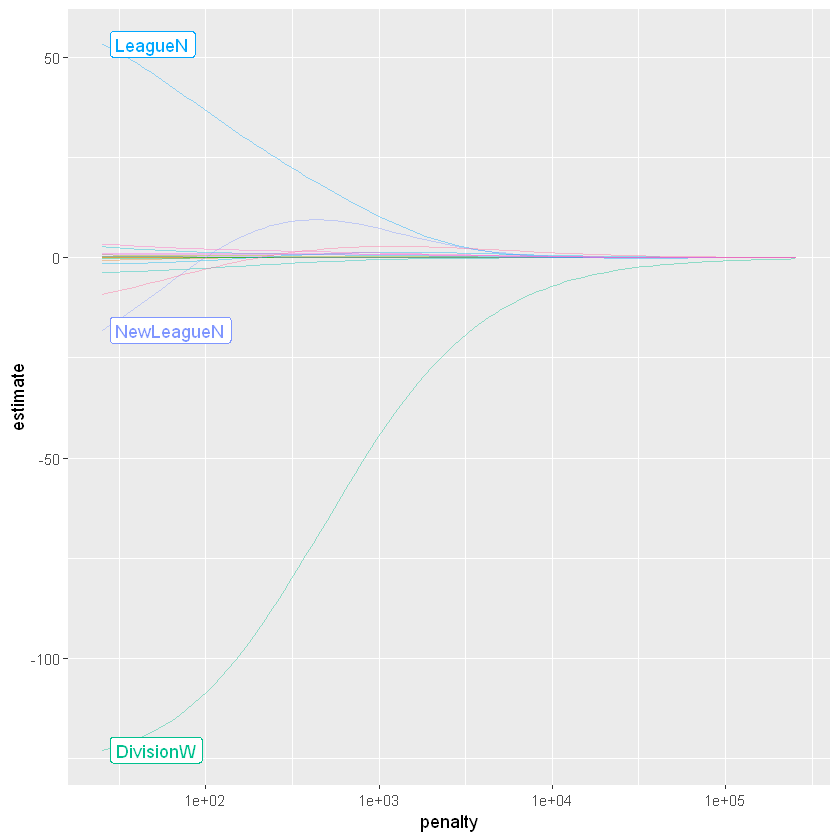
</div>


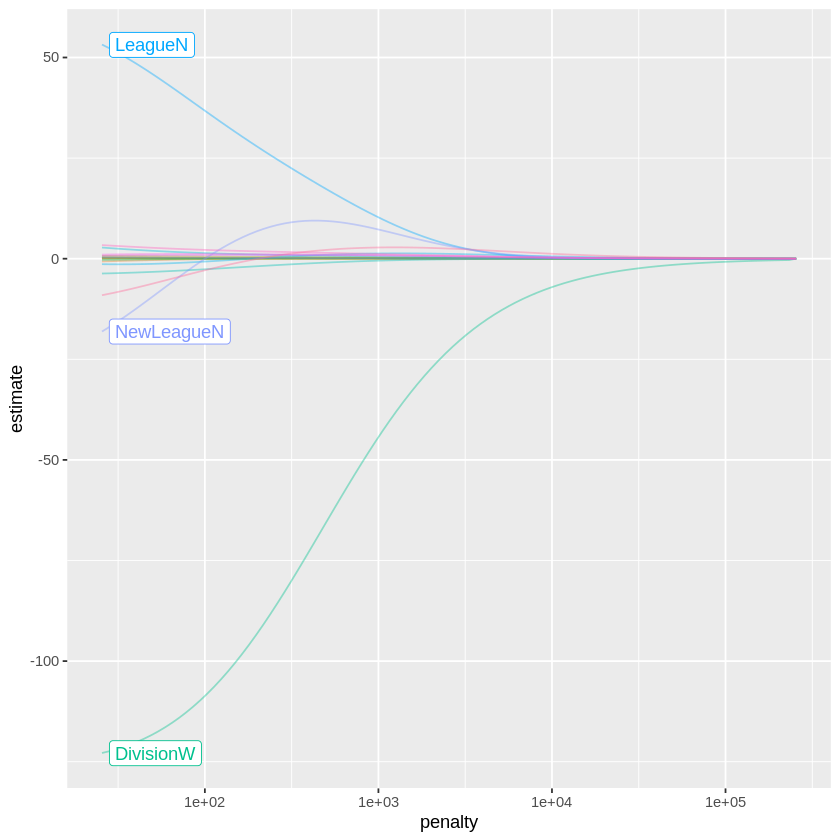

In [10]:
ridge_fit %>% autoplot()

Prediction is done like normal, if you use `predict()` by itself, then `penalty = 0` as you set in the model specification is used.

In [11]:
predict(ridge_fit, new_data = Hitters)

.pred
<dbl>
526.9155
612.8073
870.1846
416.1790
592.5733
191.6580
172.2276
210.4601
827.9990


But you can also get predictions for other values of `penalty` by specifying it in `predict()`. Test with a value of `500`. Store your output to `predict_500`


In [12]:
# Specify the ridge regression model with penalty = 0
ridge_spec <- linear_reg(mixture = 0, penalty = 0) %>%
  set_mode("regression") %>%
  set_engine("glmnet")

# Fit the ridge regression model
ridge_fit <- fit(ridge_spec, Salary ~ ., data = Hitters)

# Get predictions with penalty = 500
predict_500 <- predict(ridge_fit, new_data = Hitters, penalty = 500)

# View the predictions
head(predict_500)

.pred
<dbl>
525.3820
620.1190
894.5125
424.7725
588.5251
178.5795


In [13]:
# Hidden Tests

You saw how we can fit a ridge model and make predictions for different values of `penalty`. But it would be great if you could find the "best" value of the penalty. This is something you can use **hyperparameter** tuning for. Hyperparameter tuning is in its simplest form a way of fitting many models with different sets of hyperparameters trying to find one that performs "best".

The complexity in hyperparameter tuning can come from how you try different models. You will keep it simple for this lab and only look at grid search, only looking at evenly spaced parameter values. This is a fine enough approach if you have one or two tunable parameters but can become computationally infeasible. 

See the chapter on [iterative search](https://www.tmwr.org/iterative-search.html) from [Tidy Modeling with R](https://www.tmwr.org/) for more information.

You begin like normal by setting up a validation split (testing and training set). A **K-fold cross-validation data set** is created on the training data set with 10 folds.

In [14]:
set.seed(1234)

In [15]:
set.seed(1234)
Hitters_split <- initial_split(Hitters, strata = "Salary")
Hitters_train <- training(Hitters_split)
Hitters_test <- testing(Hitters_split)
Hitters_fold <- vfold_cv(Hitters_train, v = 10)

You can use the `tune_grid()` function to perform hyperparameter tuning using a grid search. `tune_grid()` needs 3 different things;

-   a `workflow` object containing the model and preprocessor,
-   a `rset` object containing the resamples the `workflow` should be fitted within, and
-   a `tibble` containing the parameter values to be evaluated.

Optionally a metric set of performance metrics can be supplied for evaluation. If you don't set one then a default set of performance metrics is used.

You already have a resample object created in `Hitters_fold`. Now you should create the workflow specification next.

You just used the data set as is when you fit the model earlier. However, **ridge regression** is scale sensitive so you need to make sure that the variables are on the same scale. You can use `step_normalize()`. Secondly you can deal with the factor variables yourself using `step_novel()` and `step_dummy()`. 

In [16]:
ridge_recipe <- 
  recipe(formula = Salary ~ ., data = Hitters_train) %>% 
  step_novel(all_nominal_predictors()) %>% 
  step_dummy(all_nominal_predictors()) %>% 
  step_zv(all_predictors()) %>% 
  step_normalize(all_predictors())

The model specification will look very similar to what you have seen earlier, but you will set `penalty = tune()`. This tells `tune_grid()` that the `penalty` parameter should be tuned. The output variable here will once again be `ridge_spec`. The functions used will be `linear_reg`, `set_mode` and `set_engine`.

In [17]:
# Define ridge regression model specification
ridge_spec <- linear_reg(penalty = tune()) %>%
  set_mode("regression") %>%
  set_engine("glmnet")


In [18]:
# Hidden Tests

Now you combine to create a `workflow` object. Your output variable here will be `ridge_worfklow` and the three functions you will use will be `workflow`,`add_recipe` and `add_model`. Your recipe will be `ridge_recipe` and your model will be `ridge_spec`.


In [19]:
# Define the workflow object
ridge_workflow <- workflow() %>%
  
# Add the preprocessing recipe
add_recipe(ridge_recipe) %>%
  
# Add the ridge regression model specification
add_model(ridge_spec)

# Print the workflow to inspect it
ridge_workflow



══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
4 Recipe Steps

• step_novel()
• step_dummy()
• step_zv()
• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────
Linear Regression Model Specification (regression)

Main Arguments:
  penalty = tune()

Computational engine: glmnet 


In [20]:
# Hidden Tests


The last thing you need is the values of `penalty` you are trying. This can be created using `grid_regular()` which creates a grid of evenly spaces parameter values. You use the `penalty()` function from the [dials](https://dials.tidymodels.org/) package to denote the parameter and set the range of the grid you are searching for. Note that this range is log-scaled. Your output variable here is going to be `penalty_grid`. For `penalty` use a range from -5 to 5, and 50 values (levels).  

In [21]:
# Load necessary library
library(dials)

# Define the grid of penalty values
penalty_grid <- grid_regular(penalty(range = c(-5, 5)), levels = 50)

# View the penalty grid
penalty_grid


penalty
<dbl>
1.000000e-05
1.599859e-05
2.559548e-05
4.094915e-05
6.551286e-05
1.048113e-04
1.676833e-04
2.682696e-04
4.291934e-04


In [22]:
penalty_grid$penalty[1]
penalty_grid$penalty[25]
penalty_grid$penalty[50]

[1] 1e-05

[1] 0.7906043

[1] 1e+05

In [23]:
expect_equal(penalty_grid$penalty[1], 1e-05)
expect_equal(penalty_grid$penalty[25], 0.79060432109077, tolerance=1e-5)
expect_equal(penalty_grid$penalty[50], 1e+05)

# Hidden Tests

ERROR: Error in expect_equal(penalty_grid$penalty[1], 1e-05): could not find function "expect_equal"


Using 50 levels for one parameter might seem overkill and in many applications it is. But remember that `glmnet` fits all the models in one go so adding more levels to `penalty` doesn't affect the computational speed much.

Now you have everything you need and you can fit all the models. Your output variable here is going to be `tune_res` and you will be using the `tune_grid` function. 


In [24]:
tune_res <- tune_grid(
  ridge_workflow,
  resamples = Hitters_fold, 
  grid = penalty_grid
)

→ A | warning: A correlation computation is required, but `estimate` is constant and has 0
               standard deviation, resulting in a divide by 0 error. `NA` will be returned.

There were issues with some computations   A: x1

There were issues with some computations   A: x1



Warning message:
“More than one set of outcomes were used when tuning. This should never happen. Review how the outcome is specified in your model.”


The output of `tune_grid()` can be hard to read by itself unprocessed. `autoplot()` creates a great visualization. Go on ahead and use this function for visualization. What do you notice in your plot? 

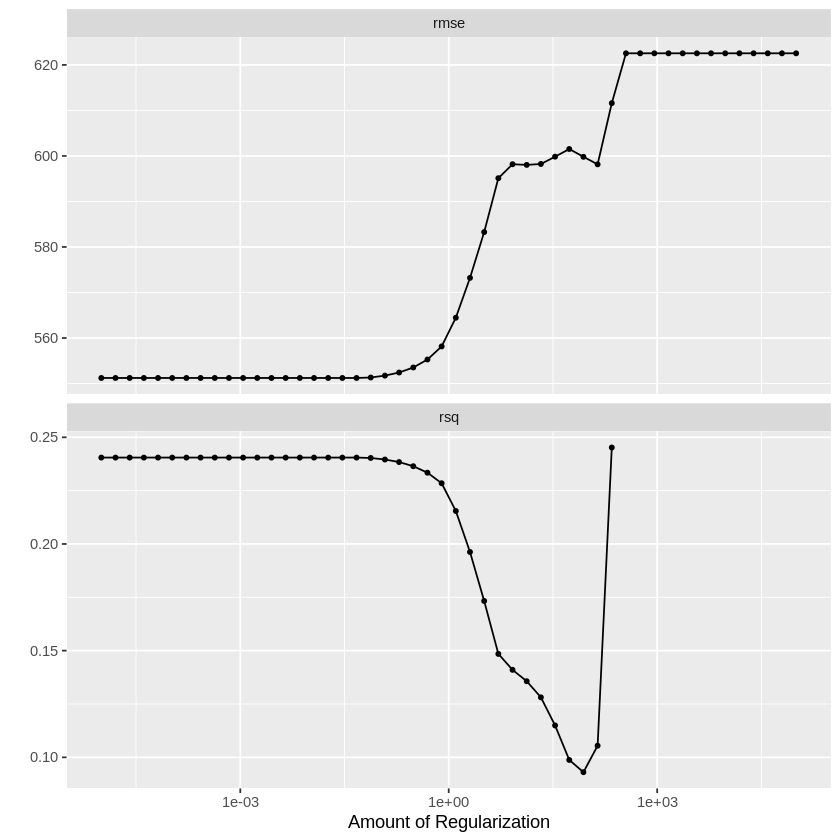

In [25]:
autoplot(tune_res)

You can also see the raw metrics that created this chart by calling `collect_matrics()`.


In [26]:
collect_metrics(tune_res)

penalty,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<fct>
1.000000e-05,rmse,standard,551.2199829,1,NA,Preprocessor1_Model01
1.000000e-05,rsq,standard,0.2404823,1,NA,Preprocessor1_Model01
1.599859e-05,rmse,standard,551.2199829,1,NA,Preprocessor1_Model02
1.599859e-05,rsq,standard,0.2404823,1,NA,Preprocessor1_Model02
2.559548e-05,rmse,standard,551.2199829,1,NA,Preprocessor1_Model03
2.559548e-05,rsq,standard,0.2404823,1,NA,Preprocessor1_Model03
4.094915e-05,rmse,standard,551.2199829,1,NA,Preprocessor1_Model04
4.094915e-05,rsq,standard,0.2404823,1,NA,Preprocessor1_Model04
6.551286e-05,rmse,standard,551.2199829,1,NA,Preprocessor1_Model05


The "best" values of this can be selected using `select_best()`, this function requires you to specify a `metric` that it should select against; use "rsq" for your metric. Your output variable here will be `best_penalty`. 


In [27]:
# Select the best penalty based on the R-squared metric
best_penalty <- select_best(tune_res, "rsq")

# Print the best penalty
best_penalty

penalty,.config
<dbl>,<fct>
222.2996,Preprocessor1_Model37


In [28]:
# Hidden Tests

This value of `penalty` can then be used with `finalize_workflow()` to update/finalize the recipe by replacing `tune()` with the value of `best_penalty`. Now, this model should be fit again, this time using the whole training data set.

In [29]:
ridge_final <- finalize_workflow(ridge_workflow, best_penalty)
ridge_final_fit <- fit(ridge_final, data = Hitters_train)

This final model can now be applied on your testing data set to validate the performance. Go ahead and perfrom this task. You will use both the`augment` and the `rsq` function. What do you notice? 


In [30]:
augment(ridge_final_fit, new_data = Hitters_test) %>%
  rsq(truth = Salary, estimate = .pred)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.3797156
